In [81]:
import scanpy as sc
import scvelo as scv
import glob
import multiprocessing
import matplotlib as plt
import pandas as pd

In [6]:
file_list = glob.glob('../../data/loom_velocity/*.loom')
len(file_list)

22

In [16]:
def import_h5(file):
    tmp = sc.read_loom(file )
    tmp.var_names_make_unique()
    tmp.obs['batch'] = file.split('_')[-1].split('.')[0]
    return tmp

In [17]:
p = multiprocessing.Pool(24)
b = p.map(import_h5, file_list)
p.close()
p.join()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Vari

In [18]:
adata = b[0].concatenate(b[1:],)

In [21]:
adata.obs['batch'].value_counts()

5     18729
21    18268
10    17817
0     16750
16    16715
7     15127
15    14247
14    14138
12    13931
17    12596
1     12060
6     11876
20    11551
2     11430
8     11131
9      9501
4      9253
3      8963
19     6506
13     5891
18     3637
11     1866
Name: batch, dtype: int64

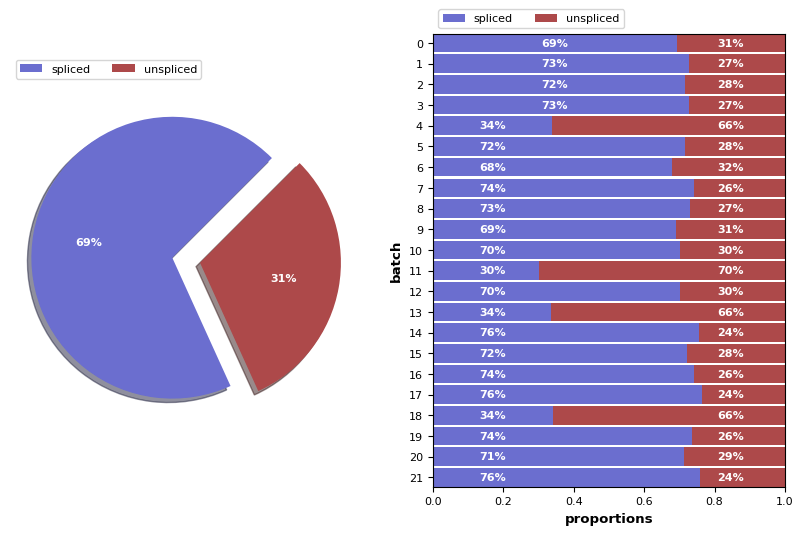

In [33]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)
scv.pl.proportions(adata,groupby='batch',figsize=[10,6]) # all sample from berry gene can not used to estimate RNA velocity 

In [34]:
adata =  adata[~adata.obs['batch'].isin(['4', '11','13','18'])]

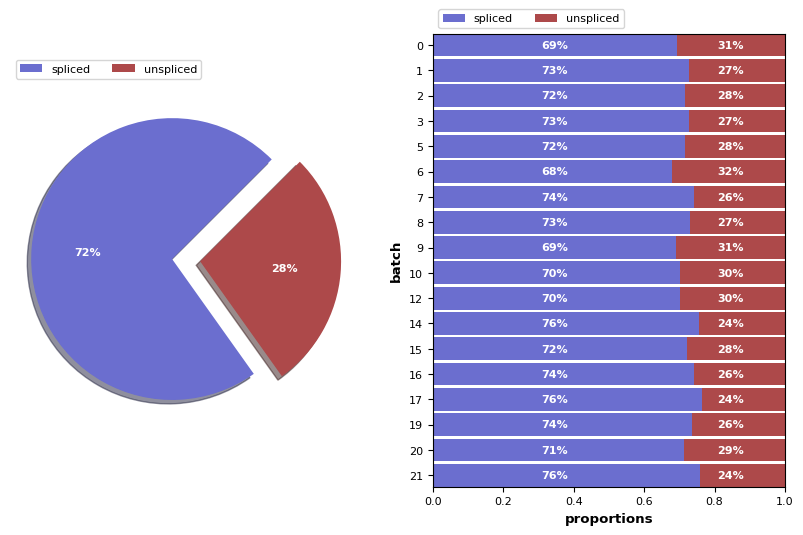

In [36]:
scv.pl.proportions(adata,groupby='batch',figsize=[10,6]) # all sample from berry gene can not used to estimate RNA velocity 

In [91]:
tmp = adata.obs.index.to_frame()
tmp['sample'] =  tmp['CellID'].str.split(':',expand=True)[0].str.split('_',expand=True)[1]
tmp['index'] = tmp['CellID'].str.split(':',expand=True)[1].str.split('x',expand = True)[0]
tmp['barcode'] = tmp['index'] + '-1_' + tmp['sample']

In [92]:
adata.obs['barcode'] =  tmp['barcode'] 
adata.obs['barcode']

CellID
count_HXX:AAAGATGCAATGCCATx-0     AAAGATGCAATGCCAT-1_HXX
count_HXX:AAACCTGTCGGACAAGx-0     AAACCTGTCGGACAAG-1_HXX
count_HXX:AAACGGGGTCTTGATGx-0     AAACGGGGTCTTGATG-1_HXX
count_HXX:AAAGATGAGACCCACCx-0     AAAGATGAGACCCACC-1_HXX
count_HXX:AAAGATGCAGGTCCACx-0     AAAGATGCAGGTCCAC-1_HXX
                                           ...          
count_LGY:TTTGGTTCACAACGTTx-21    TTTGGTTCACAACGTT-1_LGY
count_LGY:TTTGTCAAGAACAATCx-21    TTTGTCAAGAACAATC-1_LGY
count_LGY:TTTGGTTCATACGCTAx-21    TTTGGTTCATACGCTA-1_LGY
count_LGY:TTTGTCATCCTTCAATx-21    TTTGTCATCCTTCAAT-1_LGY
count_LGY:TTTGTCAGTCGAAAGCx-21    TTTGTCAGTCGAAAGC-1_LGY
Name: barcode, Length: 241336, dtype: object

In [93]:
adata.write_h5ad(filename='../../final/scvelo/all_cell_exclude_berry.h5ad')

In [95]:
dir()

['In',
 'Out',
 '_',
 '_10',
 '_11',
 '_12',
 '_13',
 '_14',
 '_19',
 '_20',
 '_21',
 '_35',
 '_38',
 '_39',
 '_4',
 '_41',
 '_42',
 '_43',
 '_44',
 '_46',
 '_47',
 '_48',
 '_49',
 '_50',
 '_51',
 '_52',
 '_53',
 '_54',
 '_56',
 '_57',
 '_58',
 '_6',
 '_61',
 '_62',
 '_63',
 '_65',
 '_66',
 '_69',
 '_71',
 '_74',
 '_75',
 '_76',
 '_77',
 '_78',
 '_80',
 '_85',
 '_87',
 '_90',
 '_92',
 '_94',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i55',
 '_i56',
 '_i57',
 